In [1]:
import os, shutil
import warnings
warnings.filterwarnings('ignore')


In [2]:
# %pip install -q -U keras-tuner


In [3]:
# os.getcwd()

In [4]:


# original_dataset_dir = '/home/kailash/VScode Python projects/tf/conv/kaggle_dataset/train'


In [5]:

# base_dir = '/home/kailash/VScode Python projects/tf/conv/small_dataset/'

# os.mkdir(base_dir)



### Folders for train,test,validation data ###

In [6]:
# train_dir = os.path.join(base_dir,'train')
# os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)


In [7]:
# os.path(test_dir)

### Directory for cat and dog images for train test validation data ###

In [8]:
# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)
# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

#### Copy from kaggle train dataset to their respective directories ####

In [9]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [10]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [11]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [12]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [13]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [14]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [15]:
import tensorflow as tf

2022-09-19 16:39:40.318298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-19 16:39:40.659943: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-19 16:39:41.644143: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64::/home/kailash/anaconda3/envs/tensorflow1/lib/
2022-09-19 16:39:41.644226: W tensorflow/stream_executor/platform/default/dso_loa

In [16]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-09-19 16:39:43.195085: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-19 16:39:43.225680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-19 16:39:43.225913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [17]:
import tensorflow as tf
from tensorflow import keras


In [18]:
import keras_tuner as kt

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),padding = "same",activation="relu",input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3),padding = "same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


2022-09-19 16:39:43.753825: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-19 16:39:43.755300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-19 16:39:43.755538: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-19 16:39:43.755690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [21]:

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4,decay=1e-6),metrics=['acc'])

In [22]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale =1./255)

train_generator = train_datagen.flow_from_directory('/home/kailash/VScode Python projects/tf/conv/small_dataset/train',target_size = (150,150),batch_size =20,class_mode ='binary')
valid_generator = test_datagen.flow_from_directory('/home/kailash/VScode Python projects/tf/conv/small_dataset/validation',target_size = (150,150),batch_size =20,class_mode ='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)

    print('labels batch shape:', labels_batch.shape)
    break



data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
train_dataset = tf.data.Dataset.from_generator(lambda:train_generator, output_types=(tf.float32, tf.float32), 
output_shapes=([20,150,150,3], (20,)))

In [25]:
valid_dataset = tf.data.Dataset.from_generator(lambda:valid_generator, output_types=(tf.float32, tf.float32), 
output_shapes=([20,150,150,3], (20,)))

In [26]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)

    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cats_dog",save_best_only=True)

In [28]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [29]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_logdir = get_run_logdir()


In [30]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir, profile_batch='10, 15',histogram_freq=1)

2022-09-19 16:39:46.196410: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-09-19 16:39:46.196580: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2022-09-19 16:39:46.197402: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2022-09-19 16:39:46.446939: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-09-19 16:39:46.449312: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


In [31]:
history = model.fit(train_dataset,steps_per_epoch=100,epochs=100,validation_data=valid_dataset,validation_steps=50,callbacks=[early_stopping_cb,checkpoint_cb,tensorboard_cb])

Epoch 1/100


2022-09-19 16:39:49.051221: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-19 16:39:50.257382: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-19 16:39:50.258539: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-19 16:39:50.258649: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-19 16:39:50.259823: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-19 16:39:50.260098: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-09-19 16:39:50.607245: I tensorflow/stream_executor/cuda/c

  9/100 [=>............................] - ETA: 13s - loss: 0.6893 - acc: 0.5222

2022-09-19 16:39:53.052342: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-09-19 16:39:53.052383: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


 15/100 [===>..........................] - ETA: 16s - loss: 0.6947 - acc: 0.5200

2022-09-19 16:39:54.428842: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-09-19 16:39:54.431109: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed
2022-09-19 16:39:54.467879: I tensorflow/core/profiler/backends/gpu/cupti_collector.cc:521]  GpuTracer has collected 993 callback api events and 977 activity events. 
2022-09-19 16:39:54.478212: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-09-19 16:39:54.491390: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_2022_09_19-16_39_46/plugins/profile/2022_09_19_16_39_54

2022-09-19 16:39:54.503086: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2022_09_19-16_39_46/plugins/profile/2022_09_19_16_39_54/kailash-ASUS-TUF-Gaming-A17-FA706IC-FA766IC.trace.json.gz
2022-09-19 16:39:54.537896: I tensorflow/core

100/100 [==============================] - ETA: 0s - loss: 0.6968 - acc: 0.5050

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-19 16:40:11.395969: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 25s 202ms/step - loss: 0.6968 - acc: 0.5050 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.6884 - acc: 0.5230

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-19 16:40:28.117518: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 17s 168ms/step - loss: 0.6884 - acc: 0.5230 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.6760 - acc: 0.5590

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-19 16:40:45.196008: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 17s 171ms/step - loss: 0.6760 - acc: 0.5590 - val_loss: 0.6478 - val_acc: 0.6140
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.6372 - acc: 0.6340

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-19 16:41:02.353376: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 17s 172ms/step - loss: 0.6372 - acc: 0.6340 - val_loss: 0.6375 - val_acc: 0.6300
Epoch 5/100
100/100 [==============================] - ETA: 0s - loss: 0.6225 - acc: 0.6505

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-19 16:41:18.954383: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


100/100 [==============================] - 17s 166ms/step - loss: 0.6225 - acc: 0.6505 - val_loss: 0.6151 - val_acc: 0.6480
Epoch 6/100
100/100 [==============================] - ETA: 0s - loss: 0.6114 - acc: 0.6580

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 16s 158ms/step - loss: 0.6114 - acc: 0.6580 - val_loss: 0.5886 - val_acc: 0.6800
Epoch 7/100
100/100 [==============================] - ETA: 0s - loss: 0.6030 - acc: 0.6695

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 16s 164ms/step - loss: 0.6030 - acc: 0.6695 - val_loss: 0.5799 - val_acc: 0.6870
Epoch 8/100
100/100 [==============================] - ETA: 0s - loss: 0.5789 - acc: 0.6880

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 17s 171ms/step - loss: 0.5789 - acc: 0.6880 - val_loss: 0.5774 - val_acc: 0.6820
Epoch 9/100
100/100 [==============================] - ETA: 0s - loss: 0.5744 - acc: 0.7035

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 17s 172ms/step - loss: 0.5744 - acc: 0.7035 - val_loss: 0.5727 - val_acc: 0.6930
Epoch 10/100
100/100 [==============================] - ETA: 0s - loss: 0.5732 - acc: 0.6890

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 16s 163ms/step - loss: 0.5732 - acc: 0.6890 - val_loss: 0.5538 - val_acc: 0.7120
Epoch 11/100
100/100 [==============================] - 16s 156ms/step - loss: 0.5691 - acc: 0.7000 - val_loss: 0.5688 - val_acc: 0.6990
Epoch 12/100
100/100 [==============================] - ETA: 0s - loss: 0.5544 - acc: 0.7290

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 18s 184ms/step - loss: 0.5544 - acc: 0.7290 - val_loss: 0.5276 - val_acc: 0.7330
Epoch 13/100
100/100 [==============================] - 15s 152ms/step - loss: 0.5615 - acc: 0.7095 - val_loss: 0.5541 - val_acc: 0.7080
Epoch 14/100
100/100 [==============================] - 14s 144ms/step - loss: 0.5390 - acc: 0.7245 - val_loss: 0.5494 - val_acc: 0.7220
Epoch 15/100
100/100 [==============================] - 15s 147ms/step - loss: 0.5323 - acc: 0.7385 - val_loss: 0.5421 - val_acc: 0.7160
Epoch 16/100
100/100 [==============================] - ETA: 0s - loss: 0.5288 - acc: 0.7340

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 17s 168ms/step - loss: 0.5288 - acc: 0.7340 - val_loss: 0.5074 - val_acc: 0.7290
Epoch 17/100
100/100 [==============================] - 14s 137ms/step - loss: 0.5311 - acc: 0.7325 - val_loss: 0.5158 - val_acc: 0.7240
Epoch 18/100
100/100 [==============================] - 14s 141ms/step - loss: 0.5144 - acc: 0.7465 - val_loss: 0.5542 - val_acc: 0.7150
Epoch 19/100
100/100 [==============================] - 14s 144ms/step - loss: 0.5041 - acc: 0.7615 - val_loss: 0.5191 - val_acc: 0.7280
Epoch 20/100
100/100 [==============================] - ETA: 0s - loss: 0.5186 - acc: 0.7395

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 16s 158ms/step - loss: 0.5186 - acc: 0.7395 - val_loss: 0.5067 - val_acc: 0.7420
Epoch 21/100
100/100 [==============================] - ETA: 0s - loss: 0.4935 - acc: 0.7590

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 16s 155ms/step - loss: 0.4935 - acc: 0.7590 - val_loss: 0.4770 - val_acc: 0.7570
Epoch 22/100
100/100 [==============================] - 13s 134ms/step - loss: 0.5036 - acc: 0.7600 - val_loss: 0.4861 - val_acc: 0.7550
Epoch 23/100
100/100 [==============================] - 14s 138ms/step - loss: 0.5002 - acc: 0.7595 - val_loss: 0.5087 - val_acc: 0.7400
Epoch 24/100
100/100 [==============================] - ETA: 0s - loss: 0.4892 - acc: 0.7630

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 17s 171ms/step - loss: 0.4892 - acc: 0.7630 - val_loss: 0.4663 - val_acc: 0.7740
Epoch 25/100
100/100 [==============================] - 15s 149ms/step - loss: 0.5041 - acc: 0.7580 - val_loss: 0.4852 - val_acc: 0.7580
Epoch 26/100
100/100 [==============================] - 14s 144ms/step - loss: 0.4917 - acc: 0.7630 - val_loss: 0.4936 - val_acc: 0.7600
Epoch 27/100
100/100 [==============================] - 15s 148ms/step - loss: 0.4650 - acc: 0.7770 - val_loss: 0.4716 - val_acc: 0.7850
Epoch 28/100
100/100 [==============================] - 14s 141ms/step - loss: 0.4753 - acc: 0.7745 - val_loss: 0.4875 - val_acc: 0.7650
Epoch 29/100
100/100 [==============================] - 15s 149ms/step - loss: 0.4858 - acc: 0.7565 - val_loss: 0.4821 - val_acc: 0.7560
Epoch 30/100
100/100 [==============================] - ETA: 0s - loss: 0.4735 - acc: 0.7805

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 17s 167ms/step - loss: 0.4735 - acc: 0.7805 - val_loss: 0.4656 - val_acc: 0.7730
Epoch 31/100
100/100 [==============================] - ETA: 0s - loss: 0.4648 - acc: 0.7760

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 18s 177ms/step - loss: 0.4648 - acc: 0.7760 - val_loss: 0.4581 - val_acc: 0.7800
Epoch 32/100
100/100 [==============================] - ETA: 0s - loss: 0.4652 - acc: 0.7795

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


100/100 [==============================] - 17s 166ms/step - loss: 0.4652 - acc: 0.7795 - val_loss: 0.4342 - val_acc: 0.7960
Epoch 33/100
100/100 [==============================] - 15s 155ms/step - loss: 0.4718 - acc: 0.7760 - val_loss: 0.4569 - val_acc: 0.7740
Epoch 34/100
100/100 [==============================] - 14s 143ms/step - loss: 0.4769 - acc: 0.7730 - val_loss: 0.5203 - val_acc: 0.7440
Epoch 35/100
100/100 [==============================] - 14s 140ms/step - loss: 0.4553 - acc: 0.7865 - val_loss: 0.4722 - val_acc: 0.7780
Epoch 36/100
100/100 [==============================] - 14s 139ms/step - loss: 0.4411 - acc: 0.7950 - val_loss: 0.4693 - val_acc: 0.7730
Epoch 37/100
100/100 [==============================] - 15s 148ms/step - loss: 0.4678 - acc: 0.7750 - val_loss: 0.4864 - val_acc: 0.7600
Epoch 38/100
100/100 [==============================] - 15s 147ms/step - loss: 0.4563 - acc: 0.7840 - val_loss: 0.4717 - val_acc: 0.7670
Epoch 39/100
100/100 [==============================] 

In [32]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

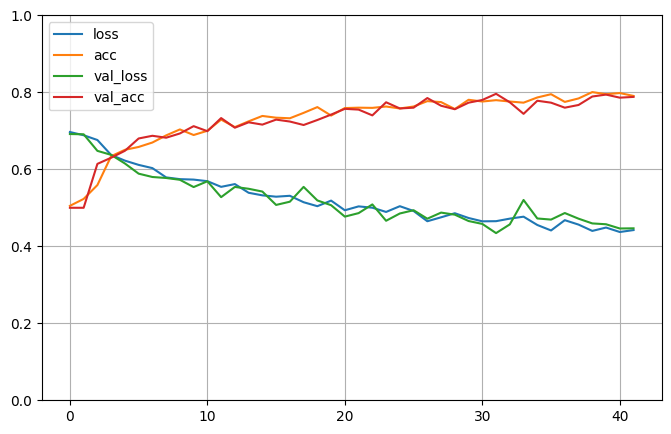

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [35]:
# model.save("cats_and_dogs")

In [37]:
!tensorboard --bind_all --logdir=./my_logs --port=6006

/bin/bash: /home/kailash/anaconda3/envs/tensorflow1/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2022-09-19 16:51:22.450733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-19 16:51:22.742667: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-19 16:51:23.685298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64: